----------------------------------

Nome: Izabela Hammerschlag

Data: 06/03/24

---------------------------------

# Zuber - Projeto proposto pela Tripleten

# Descrição do Projeto:

**Você está trabalhando como analista da Zuber, uma nova empresa de compartilhamento de caronas que está sendo lançada em Chicago. Sua tarefa é encontrar padrões nas informações disponíveis. Você quer entender as preferências dos passageiros e o impacto de fatores externos nas corridas. Trabalhando com um banco de dados, você analisará dados de concorrentes e testará uma hipótese sobre o impacto do clima na frequência das viagens.**

Além dos dados recuperados nas tarefas anteriores, você recebeu um segundo arquivo. Agora você tem estes dois CSVs:

1. project_sql_result_01.csv.

Ele contém os seguintes dados:

- company_name: nome da empresa de táxi
- trips_amount: o número de corridas para cada empresa de táxi de 15 a 16 de novembro de 2017.


2. project_sql_result_04.csv. 

Ele contém os seguintes dados:

- dropoff_location_name: bairros de Chicago onde as corridas terminaram
- average_trips: o número médio de viagens que terminaram em cada bairro em novembro de 2017.


**Para esses dois conjuntos de dados, agora você precisa:**

- importar os arquivos

- estudar os dados que eles contêm

- verifique se os tipos de dados estão corretos

- identificar os 10 principais bairros em termos de destinos

- fazer gráficos: empresas de táxi e número de corridas, 10 principais bairros por número de corridas em que esse - bairro é destino

- tirar conclusões com base em cada gráfico e explicar os resultados


## Contents <a id='back'></a>

* [Introdução](#intro)
* [Visão geral dos dados](#visao)
* [Pré-processamento de dados](#pre)
* [Análise de dados](#analise)
* [Testando as hipóteses](#teste)
* [Conclusão geral](#conclusao)

## Introdução

Uma nova empresa de compartilhamento de caronas que está sendo lançada em Chicago. Como analista da "Zuber", exploraremos os dados para encontrar padrões nas informações disponíveis. Entendendo as preferências dos passageiros e o impacto de fatores externos nas corridas. Utilizando um banco de dados, analisaremos dados de concorrentes e testaremos uma hipótese sobre o impacto do clima na frequência das viagens.

## Visão geral dos dados <a id='visao'></a>

**Bibliotecas para execução do projeto**

In [112]:
import pandas as pd # importando pandas como pd
import math # importando math
import numpy as np # importando Numpy com np
import matplotlib.pyplot as plt #importando matplotlib como plt
from scipy.stats import ttest_ind, levene # importando ttest

**Importando arquivos csv**

In [113]:
#importando o arquivo 1  e salvando com df_trips
df_trips = pd.read_csv('./moved_project_sql_result_01.csv')
df_trips.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


Este df é composto por 2 colunas, o nome das companhias de taxi (company_name) e a quantidade de corridas para cada uma (trips_amount).

In [114]:
#importando o arquivo 2  e salvando com df_location
df_location = pd.read_csv('./moved_project_sql_result_04.csv')
df_location.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


Este df é composto por 2 colunas, a localização dos bairros que terminam a corrida (dropoff_location_name) e a média de corridas para cada um deles (average_trips).

In [115]:
trips_to_airoport = pd.read_csv('./moved_project_sql_result_07.csv')
trips_to_airoport.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


Ele contém dados sobre viagens do Loop para o Aeroporto Internacional O'Hare.
* start_ts — data e hora do começo da corrida
* weather_conditions — condições meteorológicas no momento em que a corrida começou
* duration_seconds — duração da viagem em segundos

**Vamos olhar as informações que estão nestes dataframes e observar se os tipos de dados estão corretos.**

In [116]:
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


Não tem dados ausentes neste df, o Dtype parece coerente, para o nome da companhia Dtype está como object, para trips_amount Dtype está int64.

In [117]:
df_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


Não tem dados ausentes neste df, o Dtype parece coerente, dropoff_location_name  está como object e average_trips esta como float64.

In [118]:
trips_to_airoport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


Não há dados ausentes neste df. As colunas weather_conditions e duration_seconds parecem com Dtype apropriado. Podemos passar o Dtype da coluna start_ts(object) para datetime.

In [119]:
trips_to_airoport['start_ts'] #checando o formato

0       2017-11-25 16:00:00
1       2017-11-25 14:00:00
2       2017-11-25 12:00:00
3       2017-11-04 10:00:00
4       2017-11-11 07:00:00
               ...         
1063    2017-11-25 11:00:00
1064    2017-11-11 10:00:00
1065    2017-11-11 13:00:00
1066    2017-11-11 08:00:00
1067    2017-11-04 16:00:00
Name: start_ts, Length: 1068, dtype: object

In [120]:
trips_to_airoport['start_ts'] = pd.to_datetime(trips_to_airoport['start_ts'], format="%Y-%m-%d %H:%M:%S")

In [121]:
trips_to_airoport.info() # dtype corretos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


## Pré-processamento de dados <a id='pre'></a>

**Estudando os dados de df:**

In [122]:
df_trips.shape # 64 linhas e 2 colunas

(64, 2)

In [123]:
# primeiro df, primeira coluna:
df_trips['company_name'].value_counts() # vamos contar cada valor e ver se tem valores repetidos.

Flash Cab                      1
Taxi Affiliation Services      1
Norshore Cab                   1
6742 - 83735 Tasha ride inc    1
3591 - 63480 Chuks Cab         1
                              ..
Gold Coast Taxi                1
Service Taxi Association       1
5 Star Taxi                    1
303 Taxi                       1
3556 - 36214 RC Andrews Cab    1
Name: company_name, Length: 64, dtype: int64

Podemos perceber que não exitem nomes repetidos, são 64 companhias de taxi.

In [124]:
df_trips['company_name'].describe() # 64 dados unicos

count            64
unique           64
top       Flash Cab
freq              1
Name: company_name, dtype: object

In [125]:
df_trips['trips_amount'].describe()

count       64.000000
mean      2145.484375
std       3812.310186
min          2.000000
25%         20.750000
50%        178.500000
75%       2106.500000
max      19558.000000
Name: trips_amount, dtype: float64

Temos valores variados de corridas para cada companhia, sendo 2 corridas o valor mínimo, 19558 o valor máximo. MÉDIA: 2145, MEDIANA: 178.

In [126]:
# segundo df, primeira coluna:
df_location['dropoff_location_name'].describe()

count       94
unique      94
top       Loop
freq         1
Name: dropoff_location_name, dtype: object

In [127]:
df_location['dropoff_location_name'].value_counts()

Loop               1
Chatham            1
Clearing           1
Auburn Gresham     1
Washington Park    1
                  ..
Albany Park        1
Wicker Park        1
Avondale           1
Hyde Park          1
Riverdale          1
Name: dropoff_location_name, Length: 94, dtype: int64

Podemos perceber que não exitem nomes repetidos, são 94 Bairros onde terminam as corridas. Os dados aparentam estar corretos.

In [128]:
# segundo df, segunda coluna:
df_location['average_trips'].describe()


count       94.000000
mean       599.953728
std       1714.591098
min          1.800000
25%         14.266667
50%         52.016667
75%        298.858333
max      10727.466667
Name: average_trips, dtype: float64

Temos valores variados de corridas para cada bairro, sendo 1.8 corridas o valor mínimo, 10727 o valor máximo. MÉDIA: 599.9, MEDIANA: 52.

In [129]:
# terceiro df, primeira coluna
trips_to_airoport['start_ts'].value_counts() # dia e horário das corridas

2017-11-11 10:00:00    48
2017-11-04 12:00:00    46
2017-11-04 14:00:00    46
2017-11-11 06:00:00    45
2017-11-11 08:00:00    43
                       ..
2017-11-18 03:00:00     1
2017-11-04 02:00:00     1
2017-11-18 00:00:00     1
2017-11-04 22:00:00     1
2017-11-18 20:00:00     1
Name: start_ts, Length: 81, dtype: int64

In [130]:
trips_to_airoport['weather_conditions'].value_counts() # temos 888 linhas com o clima em boas condições, e 180 em más condições

Good    888
Bad     180
Name: weather_conditions, dtype: int64

In [131]:
trips_to_airoport['duration_seconds'].describe()

count    1068.000000
mean     2071.731273
std       769.461125
min         0.000000
25%      1438.250000
50%      1980.000000
75%      2580.000000
max      7440.000000
Name: duration_seconds, dtype: float64

In [132]:
trips_to_airoport[trips_to_airoport['duration_seconds'] == 0]

,start_ts,weather_conditions,duration_seconds
163,2017-11-11 09:00:00,Good,0.0
168,2017-11-11 07:00:00,Good,0.0
204,2017-11-18 19:00:00,Good,0.0
552,2017-11-04 01:00:00,Good,0.0
801,2017-11-04 09:00:00,Good,0.0
1063,2017-11-25 11:00:00,Good,0.0


In [133]:
trips_to_airoport = trips_to_airoport[trips_to_airoport['duration_seconds'] != 0] 
# vamos eliminar essas "corridas" de 0 segundos, porque provavelmente elas não chegaram a acontecer

In [134]:
trips_to_airoport[trips_to_airoport['duration_seconds'] == 0].value_counts()

Series([], dtype: int64)

In [135]:
trips_to_airoport.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1062 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1062 non-null   datetime64[ns]
 1   weather_conditions  1062 non-null   object        
 2   duration_seconds    1062 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 33.2+ KB


dataframes pronto para as análises

## Análise de dados <a id=analise></a>

**Vamos Identificar os 10 principais bairros em termos de destino**

Vamos agrupar por localização, e exibir os 10 destinos com maior valores de médias de corridas.

In [136]:
top10_location = df_location.groupby('dropoff_location_name')['average_trips'].sum().sort_values(ascending=False).head(10)
top10_location

dropoff_location_name
Loop                  10727.466667
River North            9523.666667
Streeterville          6664.666667
West Loop              5163.666667
O'Hare                 2546.900000
Lake View              2420.966667
Grant Park             2068.533333
Museum Campus          1510.000000
Gold Coast             1364.233333
Sheffield & DePaul     1259.766667
Name: average_trips, dtype: float64

Top 10:

1- Loop 

2-  River North  

3-  Streeterville    

4-  West Loop       

5-  O'Hare          

6- Lake View        

7- Grant Park             

8- Museum Campus     

9- Gold Coast        

10- Sheffield & DePaul     

**Para melhor visualizar os dados, observe o gráfico abaixo. Empresa de táxi e número de corridas e 10 principais bairros por número de corridas em que esse bairro é destino.**

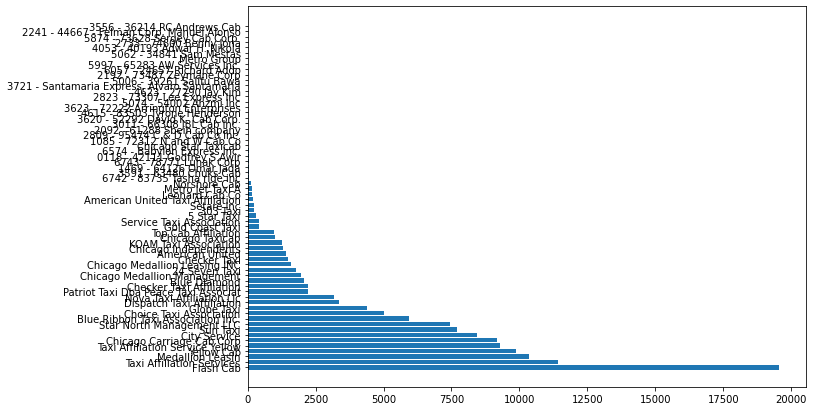

In [137]:
#empresas de táxi e número de corridas:
plt.figure(figsize=(10, 7));
plt.barh(df_trips["company_name"],df_trips["trips_amount"]);

São 64 companhias, como podemos perceber existem companhias com poucas corridas e outras com uma quantidade muito grande de corridas. Para melhor visualizar vamos pegar apenas as mais utilizadas (mais famosas da cidade).

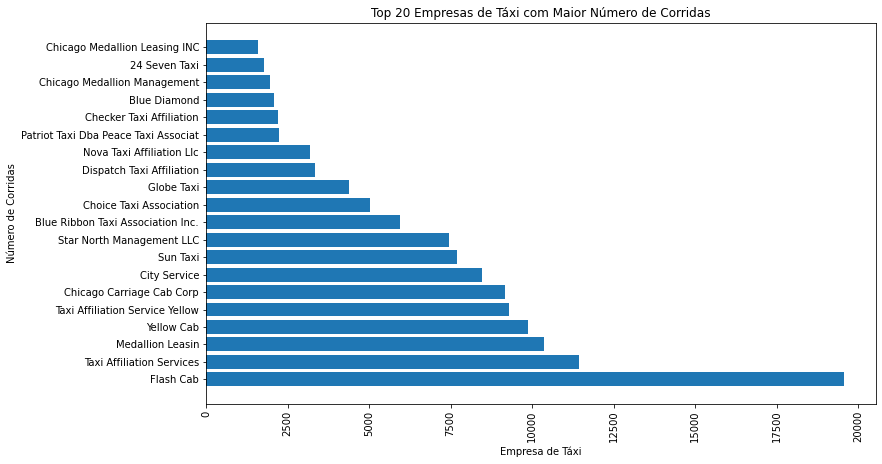

In [138]:
#empresas de táxi e número de corridas:

# Agrupar e somar das corridas por empresa
df_trips_grouped = df_trips.groupby("company_name").sum().reset_index()

# Ordenar as empresas pelo número de corridas em ordem decrescente
df_trips_sorted = df_trips_grouped.sort_values(by="trips_amount", ascending=False)

# Selecionar as 20 empresas com maior número de corridas
top_20_companies = df_trips_sorted.head(20)

# Criar o gráfico de barras
plt.figure(figsize=(12, 7));
plt.barh(top_20_companies["company_name"], top_20_companies["trips_amount"]);
plt.title("Top 20 Empresas de Táxi com Maior Número de Corridas");
plt.xlabel("Empresa de Táxi");
plt.ylabel("Número de Corridas");
plt.xticks(rotation=90);


   As empresas mais utilizadas estão neste top 20. Podemos observar que elas variam de 2500 corridas a 19500 corridas. Sendo a Flash Cab o valor mais discrepantes comparado com o conjunto.

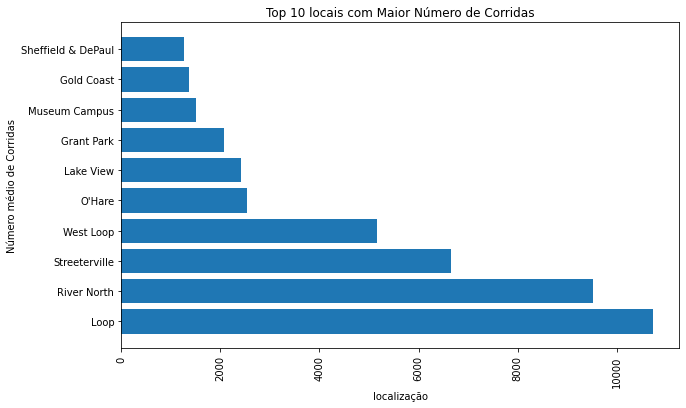

In [139]:
# 10 principais bairros por número de corridas em que esse - bairro é destino
#df_location.groupby('dropoff_location_name')['average_trips'].sum().sort_values(ascending=False).head(10).reset_index()

df_location_grouped = df_location.groupby('dropoff_location_name').sum().reset_index()

# Ordenar os locais pelo número de corridas em ordem decrescente
df_location_sorted = df_location_grouped.sort_values(by='average_trips', ascending=False)

# Selecionar os 10 locais com maior número de corridas
top_10_location = df_location_sorted.head(10)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6));
plt.barh(top_10_location["dropoff_location_name"], top_10_location["average_trips"]);
plt.title("Top 10 locais com Maior Número de Corridas");
plt.xlabel("localização");
plt.ylabel("Número médio de Corridas");
plt.xticks(rotation=90);

O destino Loop lidera com mais de 10 mil corridas, em seguida River North e Streetville.

In [140]:
top_10_location.median() 

<ipython-input-140-f3390fb6aa21>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  top_10_location.median()


average_trips    2483.933333
dtype: float64

A mediana de corridas do top 10 locais de destino é de aproximadamente 2484

In [141]:
#df_trips.boxplot();
#df_location.boxplot();
#df_location.plot();
#df_trips.plot();

## Testando as hipóteses <a id='teste'><a/>

In [142]:
trips_to_airoport.sample(4)

,start_ts,weather_conditions,duration_seconds
814,2017-11-11 10:00:00,Good,1620.0
923,2017-11-11 07:00:00,Good,1380.0
458,2017-11-11 14:00:00,Good,2820.0
868,2017-11-04 09:00:00,Good,1440.0


Ele contém dados sobre viagens do Loop para o Aeroporto Internacional O'Hare.

- start_ts — data e hora do começo da corrida

- weather_conditions — condições meteorológicas no momento em que a corrida começou

- duration_seconds — duração da viagem em segundos

Testando a hipótese: "A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos."

Defina o valor do nível de significância (alfa)

Explique: como você formou as hipóteses nula e alternativa.

In [143]:
trips_to_airoport['duration_seconds'].mean()

2083.4359698681733

A média de duração das corridas é de 2083 segundos. Aproximadamente 34 minutos.

Como é necessário testar a hipótese para o dia da semana (sábado), vamos adicionar uma nova coluna para o dia da semana.

In [144]:
trips_to_airoport['start_ts'] = pd.to_datetime(trips_to_airoport['start_ts'])
trips_to_airoport['weekday'] = trips_to_airoport['start_ts'].dt.day_name()
trips_to_airoport['weekday'].value_counts()

Saturday    1062
Name: weekday, dtype: int64

Todos os dados são de sábados. Agora vamos separar os dados para os dias em que o tempo está bom, e o dia em que o tempo está ruim. Como temos que comparar apenas com a duração da viagem vamos pegar a coluna duration_seconds para testar se existem diferenças.

In [145]:
good_weather = trips_to_airoport[trips_to_airoport['weather_conditions'] == 'Good']['duration_seconds']
bad_weather = trips_to_airoport[trips_to_airoport['weather_conditions'] == 'Bad']['duration_seconds']

Antes de testar as hipóteses vamos olhar para os valores de cada uma delas:

In [146]:
good_weather.sort_values()

15       60.0
424     420.0
874    1018.0
194    1020.0
713    1063.0
        ...  
646    4380.0
79     4800.0
583    4980.0
619    6420.0
354    7440.0
Name: duration_seconds, Length: 882, dtype: float64

In [147]:
bad_weather.sort_values()

203      480.0
860      480.0
743     1182.0
628     1200.0
1000    1200.0
         ...  
719     3600.0
905     3720.0
788     3779.0
110     4044.0
276     4980.0
Name: duration_seconds, Length: 180, dtype: float64

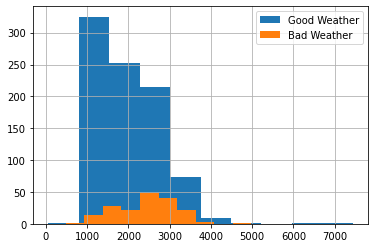

In [148]:
good_weather.hist(label='Good Weather')
bad_weather.hist(label='Bad Weather')
plt.legend();

In [149]:
print(f'Média de tempo com boa condição climática : {good_weather.mean()}')
print(f'Média de tempo com condição climática ruim : {bad_weather.mean()}')

Média de tempo com boa condição climática : 2013.2789115646258
Média de tempo com condição climática ruim : 2427.2055555555557


Visualmente podemos perceber uma diferença, good_weather tem uma média em torno de 2000 segundos (o tempo da corrida), já quando o tempo está ruim (bad_weather) a média fica mais alta em torno de 2400 segundos.

Agora vamos testar a hipótese e ver se existe realmente uma diferença com embasamento estatístico. Para este teste escolhi ttest_ind. Fonte: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

Vamos pegar as duas amostra de dados, para o clima bom (good_weather) o clima ruim (bad_weather). 
O teste estatístico vai calcular para as médias dessas duas amostras, de acordo com a comparação do p-valor e o alpha

* **Segue as hipóteses**

hipotese nula: Não existe diferença significativa no tempo das corridas devido a influência do clima.

hipotese alternativa: O clima influência no tempo das corridas.

In [150]:
stat, p_val = levene(good_weather, bad_weather)

alpha = 0.05 # escolhi este alpha pois é o padrão utilizado

if p_val < alpha:
    print(f'p-valor: {p_val}, podemos prezumir que as variâncias são iguais')
    equal_var = True
else:
    print(f'p-valor: {p_val}, não podemos prezumir que as variâncias são iguais')
    equal_var = False

p-valor: 0.6687312920630069, não podemos prezumir que as variâncias são iguais


In [151]:
p_val = ttest_ind(good_weather, bad_weather, equal_var=equal_var).pvalue

if p_val < alpha:
    print(f'p-valor: {p_val}, Podemos rejeitar a hipotese nula.') # são diferentes
else:
    print(f'p-valor: {p_val}, Não podemos rejeitar a hipotese nula.') # não tem diferença significativa

p-valor: 2.4173590471585584e-11, Podemos rejeitar a hipotese nula.


Como observado nos gráficos, temos evidências estatisticas para dizer as condições climáticas em relação com o tempo médio das corridas

## Conclusão Geral <a id='conclusao'></a>

Concluimos que o top 3 locais de destino são em ordem: Loop, River North, Streeterville. Além disto as principais companhias utilizadas são Flash Cab, taxi filliation services e Medallion leasin. 

Testamos a hipótese de que fatores externos interferem no tempo das corridas, e neste caso específico testamos que em sábados chuvosos podemos ver uma variação no tempo médio de corridas comparando com valores médios quando há bom tempo. Sendo as corridas com mal tempo (bad weather), com maiores duração. 